# Phân Tích Dân Số Các Tỉnh Thành Của Việt Nam Năm 2024

- Tải và xử lý dữ liệu dân số các tỉnh Việt Nam từ file CSV.
- Tính mật độ dân số (dân số/diện tích).
- Ánh xạ tất cả 63 tỉnh/thành phố vào các vùng địa lý.
- Tạo các biểu đồ: cột, phân tán, tròn.
- Vẽ bản đồ nhiệt trên bản đồ Việt Nam để hiển thị phân bố dân số/mật độ dân số.
- Xuất dữ liệu đã sắp xếp theo dân số giảm dần vào file CSV, bao gồm cột vùng và mật độ dân số.

## 1. Import các thư viện

In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import numpy as np
from matplotlib.colors import LogNorm

- Nếu bạn bị lỗi import thư viện bạn có thể thực hiện import các thư viện cần thiết bần câu lệnh sau trên terminal:
      pip install pandas matplotlib seaborn geopandas

## 2. Tải và xử lý dữ liệu

- Lấy dữ liệu tử file csv

In [231]:
df_population = pd.read_csv(r"D:\Big_Data_Basic\project\BIGDATA_PROJECT\CrawlDataLib\data\population.csv")
df_population.head()

,khu_vuc,dan_so,dien_tich
0,TP Hồ Chí Minh,8993082,2061.0
1,Hà Nội,8053663,3358.9
2,Thanh Hóa,3640128,11114.7
3,Nghệ An,3327791,16493.7
4,Đồng Nai,3097107,5905.7


- Kiểm tra dữ liệu bị thiếu

In [233]:
print("Kiểm tra dữ liệu bị thiếu:")
print(df_population.isnull().sum())

Kiểm tra dữ liệu bị thiếu:
khu_vuc      0
dan_so       0
dien_tich    0
dtype: int64


- Tính mật độ dân số (dân/km²)

In [235]:
df_population['mat_do_dan_so'] = df_population['dan_so'] / df_population['dien_tich']
df_population.head()

,khu_vuc,dan_so,dien_tich,mat_do_dan_so
0,TP Hồ Chí Minh,8993082,2061.0,4363.455604
1,Hà Nội,8053663,3358.9,2397.708476
2,Thanh Hóa,3640128,11114.7,327.505736
3,Nghệ An,3327791,16493.7,201.761339
4,Đồng Nai,3097107,5905.7,524.426740


- Chuẩn hóa tên tỉnh trong cột 'khu_vuc'

In [237]:
normalization_map = {
    'TP Hồ Chí Minh': 'TP Hồ Chí Minh',
    'Hà Nội': 'Hà Nội',
    'Thanh Hóa': 'Thanh Hóa',
    'Nghệ An': 'Nghệ An',
    'Đồng Nai': 'Đồng Nai',
    'Bình Dương': 'Bình Dương',
    'Hải Phòng': 'Hải Phòng',
    'An Giang': 'An Giang',
    'Hải Dương': 'Hải Dương',
    'Dak Lak': 'Đắk Lắk',
    'Thái Bình': 'Thái Bình',
    'Bắc Giang': 'Bắc Giang',
    'Nam Định': 'Nam Định',
    'Tiền Giang': 'Tiền Giang',
    'Kiên Giang': 'Kiên Giang',
    'Long An': 'Long An',
    'Đồng Tháp': 'Đồng Tháp',
    'Gia Lai': 'Gia Lai',
    'Quảng Nam': 'Quảng Nam',
    'Bình Định': 'Bình Định',
    'Phú Thọ': 'Phú Thọ',
    'Bắc Ninh': 'Bắc Ninh',
    'Quảng Ninh': 'Quảng Ninh',
    'Lâm Đồng': 'Lâm Đồng',
    'Hà Tĩnh': 'Hà Tĩnh',
    'Bến Tre': 'Bến Tre',
    'Thái Nguyên': 'Thái Nguyên',
    'Hưng Yên': 'Hưng Yên',
    'Sơn La': 'Sơn La',
    'TP Cần Thơ': 'Cần Thơ',
    'Quảng Ngãi': 'Quảng Ngãi',
    'Khánh Hòa': 'Khánh Hòa',
    'Bình Thuận': 'Bình Thuận',
    'Sóc Trăng': 'Sóc Trăng',
    'Cà Mau': 'Cà Mau',
    'Tây Ninh': 'Tây Ninh',
    'Vĩnh Phúc': 'Vĩnh Phúc',
    'Bà rịa Vũng Tàu': 'Bà Rịa - Vũng Tàu',
    'Tp Đà Nẵng': 'Đà Nẵng',
    'Thừa Thiên Huế': 'Thừa Thiên Huế',
    'Vĩnh Long': 'Vĩnh Long',
    'Trà Vinh': 'Trà Vinh',
    'Bình Phước': 'Bình Phước',
    'Ninh Bình': 'Ninh Bình',
    'Bạc Liêu': 'Bạc Liêu',
    'Quảng Bình': 'Quảng Bình',
    'Phú Yên': 'Phú Yên',
    'Hà Giang': 'Hà Giang',
    'Hòa Bình': 'Hòa Bình',
    'Hà Nam': 'Hà Nam',
    'Yên Bái': 'Yên Bái',
    'Tuyên Quang': 'Tuyên Quang',
    'Lạng Sơn': 'Lạng Sơn',
    'Hậu Giang': 'Hậu Giang',
    'Lào Cai': 'Lào Cai',
    'Quảng Tri': 'Quảng Trị',
    'Dak Nông': 'Đắk Nông',
    'Điện Biên': 'Điện Biên',
    'Ninh Thuận': 'Ninh Thuận',
    'Kon Tum': 'Kon Tum',
    'Cao Bằng': 'Cao Bằng',
    'Lai Châu': 'Lai Châu',
    'Bắc Kan': 'Bắc Kạn'
}
df_population['khu_vuc'] = df_population['khu_vuc'].map(normalization_map)

- Kiểm tra tên tỉnh sau chuẩn hóa

In [239]:
print("Tên tỉnh sau chuẩn hóa (khu_vuc):")
print(df_population['khu_vuc'].unique())

Tên tỉnh sau chuẩn hóa (khu_vuc):
['TP Hồ Chí Minh' 'Hà Nội' 'Thanh Hóa' 'Nghệ An' 'Đồng Nai' 'Bình Dương'
 'Hải Phòng' 'An Giang' 'Hải Dương' 'Đắk Lắk' 'Thái Bình' 'Bắc Giang'
 'Nam Định' 'Tiền Giang' 'Kiên Giang' 'Long An' 'Đồng Tháp' 'Gia Lai'
 'Quảng Nam' 'Bình Định' 'Phú Thọ' 'Bắc Ninh' 'Quảng Ninh' 'Lâm Đồng'
 'Hà Tĩnh' 'Bến Tre' 'Thái Nguyên' 'Hưng Yên' 'Sơn La' 'Cần Thơ'
 'Quảng Ngãi' 'Khánh Hòa' 'Bình Thuận' 'Sóc Trăng' 'Cà Mau' 'Tây Ninh'
 'Vĩnh Phúc' 'Bà Rịa - Vũng Tàu' 'Đà Nẵng' 'Thừa Thiên Huế' 'Vĩnh Long'
 'Trà Vinh' 'Bình Phước' 'Ninh Bình' 'Bạc Liêu' 'Quảng Bình' 'Phú Yên'
 'Hà Giang' 'Hòa Bình' 'Hà Nam' 'Yên Bái' 'Tuyên Quang' 'Lạng Sơn'
 'Hậu Giang' 'Lào Cai' 'Quảng Trị' 'Đắk Nông' 'Điện Biên' 'Ninh Thuận'
 'Kon Tum' 'Cao Bằng' 'Lai Châu' 'Bắc Kạn']


- Ánh xạ vùng địa lý cho tất cả 63 tỉnh/thành phố

In [241]:
regions = {
    'Hà Nội': 'Đồng bằng sông Hồng',
    'Hải Phòng': 'Đồng bằng sông Hồng',
    'Bắc Ninh': 'Đồng bằng sông Hồng',
    'Hà Nam': 'Đồng bằng sông Hồng',
    'Hải Dương': 'Đồng bằng sông Hồng',
    'Hưng Yên': 'Đồng bằng sông Hồng',
    'Nam Định': 'Đồng bằng sông Hồng',
    'Ninh Bình': 'Đồng bằng sông Hồng',
    'Thái Bình': 'Đồng bằng sông Hồng',
    'Vĩnh Phúc': 'Đồng bằng sông Hồng',
    'Bắc Giang': 'Đông Bắc Bộ',
    'Bắc Kạn': 'Đông Bắc Bộ',
    'Cao Bằng': 'Đông Bắc Bộ',
    'Hà Giang': 'Đông Bắc Bộ',
    'Lạng Sơn': 'Đông Bắc Bộ',
    'Phú Thọ': 'Đông Bắc Bộ',
    'Quảng Ninh': 'Đông Bắc Bộ',
    'Thái Nguyên': 'Đông Bắc Bộ',
    'Tuyên Quang': 'Đông Bắc Bộ',
    'Lào Cai': 'Tây Bắc Bộ',
    'Yên Bái': 'Tây Bắc Bộ',
    'Điện Biên': 'Tây Bắc Bộ',
    'Hòa Bình': 'Tây Bắc Bộ',
    'Lai Châu': 'Tây Bắc Bộ',
    'Sơn La': 'Tây Bắc Bộ',
    'Thanh Hóa': 'Bắc Trung Bộ',
    'Nghệ An': 'Bắc Trung Bộ',
    'Hà Tĩnh': 'Bắc Trung Bộ',
    'Quảng Bình': 'Bắc Trung Bộ',
    'Quảng Trị': 'Bắc Trung Bộ',
    'Thừa Thiên Huế': 'Bắc Trung Bộ',
    'Đà Nẵng': 'Nam Trung Bộ',
    'Quảng Nam': 'Nam Trung Bộ',
    'Quảng Ngãi': 'Nam Trung Bộ',
    'Bình Định': 'Nam Trung Bộ',
    'Phú Yên': 'Nam Trung Bộ',
    'Khánh Hòa': 'Nam Trung Bộ',
    'Ninh Thuận': 'Nam Trung Bộ',
    'Bình Thuận': 'Nam Trung Bộ',
    'Kon Tum': 'Tây Nguyên',
    'Gia Lai': 'Tây Nguyên',
    'Đắk Lắk': 'Tây Nguyên',
    'Đắk Nông': 'Tây Nguyên',
    'Lâm Đồng': 'Tây Nguyên',
    'Bình Phước': 'Đông Nam Bộ',
    'Bình Dương': 'Đông Nam Bộ',
    'Đồng Nai': 'Đông Nam Bộ',
    'Tây Ninh': 'Đông Nam Bộ',
    'Bà Rịa - Vũng Tàu': 'Đông Nam Bộ',
    'TP Hồ Chí Minh': 'Đông Nam Bộ',
    'Long An': 'Đồng bằng sông Cửu Long',
    'Tiền Giang': 'Đồng bằng sông Cửu Long',
    'Bến Tre': 'Đồng bằng sông Cửu Long',
    'Trà Vinh': 'Đồng bằng sông Cửu Long',
    'Vĩnh Long': 'Đồng bằng sông Cửu Long',
    'Đồng Tháp': 'Đồng bằng sông Cửu Long',
    'An Giang': 'Đồng bằng sông Cửu Long',
    'Kiên Giang': 'Đồng bằng sông Cửu Long',
    'Cần Thơ': 'Đồng bằng sông Cửu Long',
    'Hậu Giang': 'Đồng bằng sông Cửu Long',
    'Sóc Trăng': 'Đồng bằng sông Cửu Long',
    'Bạc Liêu': 'Đồng bằng sông Cửu Long',
    'Cà Mau': 'Đồng bằng sông Cửu Long'
}
df_population['vung'] = df_population['khu_vuc'].map(regions)

In [243]:
df_population.head()

,khu_vuc,dan_so,dien_tich,mat_do_dan_so,vung
0,TP Hồ Chí Minh,8993082,2061.0,4363.455604,Đông Nam Bộ
1,Hà Nội,8053663,3358.9,2397.708476,Đồng bằng sông Hồng
2,Thanh Hóa,3640128,11114.7,327.505736,Bắc Trung Bộ
3,Nghệ An,3327791,16493.7,201.761339,Bắc Trung Bộ
4,Đồng Nai,3097107,5905.7,524.426740,Đông Nam Bộ


- Sắp xếp dữ liệu theo dân số giảm dần

In [245]:
df_population_sorted = df_population.sort_values(by='dan_so', ascending=False)
df_population_sorted.head(10)

,khu_vuc,dan_so,dien_tich,mat_do_dan_so,vung
0,TP Hồ Chí Minh,8993082,2061.0,4363.455604,Đông Nam Bộ
1,Hà Nội,8053663,3358.9,2397.708476,Đồng bằng sông Hồng
2,Thanh Hóa,3640128,11114.7,327.505736,Bắc Trung Bộ
3,Nghệ An,3327791,16493.7,201.761339,Bắc Trung Bộ
4,Đồng Nai,3097107,5905.7,524.426740,Đông Nam Bộ
5,Bình Dương,2426561,2694.7,900.493933,Đông Nam Bộ
6,Hải Phòng,2028514,1522.5,1332.357307,Đồng bằng sông Hồng
7,An Giang,1908352,3536.7,539.585489,Đồng bằng sông Cửu Long
8,Hải Dương,1892254,1668.2,1134.308836,Đồng bằng sông Hồng
9,Đắk Lắk,1869322,13030.5,143.457427,Tây Nguyên


- Xuất dữ liệu ra file CSV

In [247]:
export_csv_path = "D:/Big_Data_Basic/project/BIGDATA_PROJECT/Data/vietnam_population_sorted_2024.csv"
df_population_sorted.to_csv(export_csv_path, index=False, encoding='utf-8')
print("Đã xuất dữ liệu ra file 'vietnam_population_sorted_2024.csv' tại thư mục BIGDATA_PROJECT/Data")

Đã xuất dữ liệu ra file 'vietnam_population_sorted_2024.csv' tại thư mục BIGDATA_PROJECT/Data


## 3. Trực quan hóa dữ liệu

### 3.1. Biểu đồ cột: Top 10 tỉnh theo dân số nhiều nhất

- Thiết lập kiểu biểu đồ

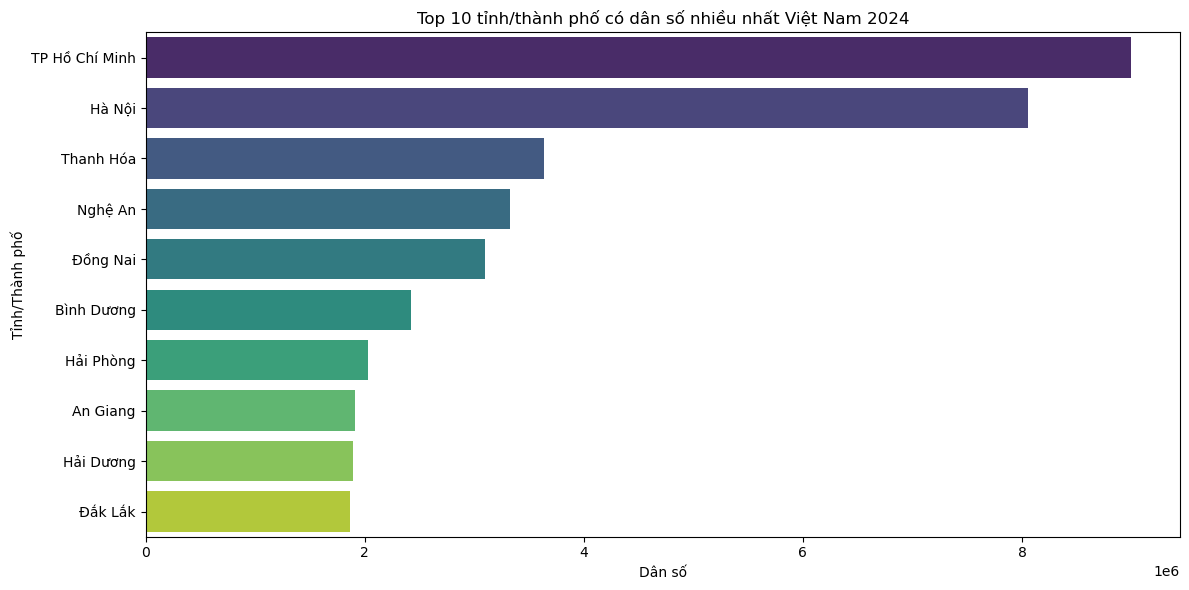

In [249]:
top_10_population = df_population_sorted.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='dan_so', y='khu_vuc', hue='khu_vuc', data=top_10_population, palette='viridis', legend=False)
plt.title('Top 10 tỉnh/thành phố có dân số nhiều nhất Việt Nam 2024')
plt.xlabel('Dân số')
plt.ylabel('Tỉnh/Thành phố')
plt.tight_layout()
plt.show()

### 3.2. Biểu đồ cột: Top 10 tỉnh theo mật độ dân số cao nhất

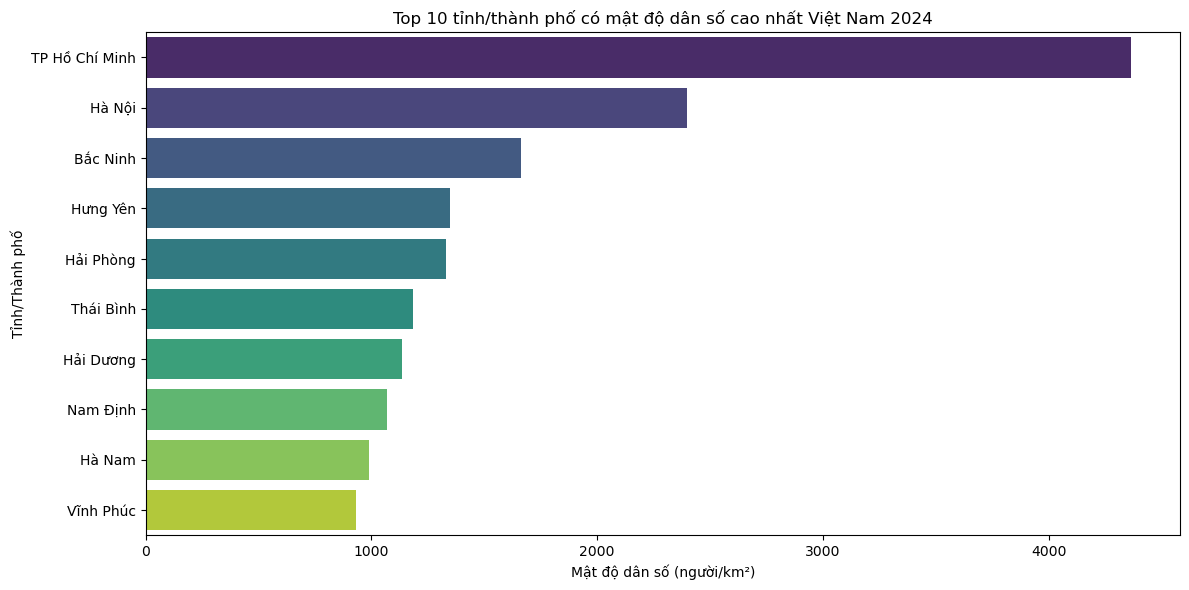

In [251]:
top_10_density = df_population.nlargest(10, 'mat_do_dan_so')
plt.figure(figsize=(12, 6))
sns.barplot(x='mat_do_dan_so', y='khu_vuc', hue='khu_vuc', data=top_10_density, palette='viridis', legend=False)
plt.title('Top 10 tỉnh/thành phố có mật độ dân số cao nhất Việt Nam 2024')
plt.xlabel('Mật độ dân số (người/km²)')
plt.ylabel('Tỉnh/Thành phố')
plt.tight_layout()
plt.show()

### 3.3. Biểu đồ phân tán: Quan hệ giữa Dân số và Diện tích

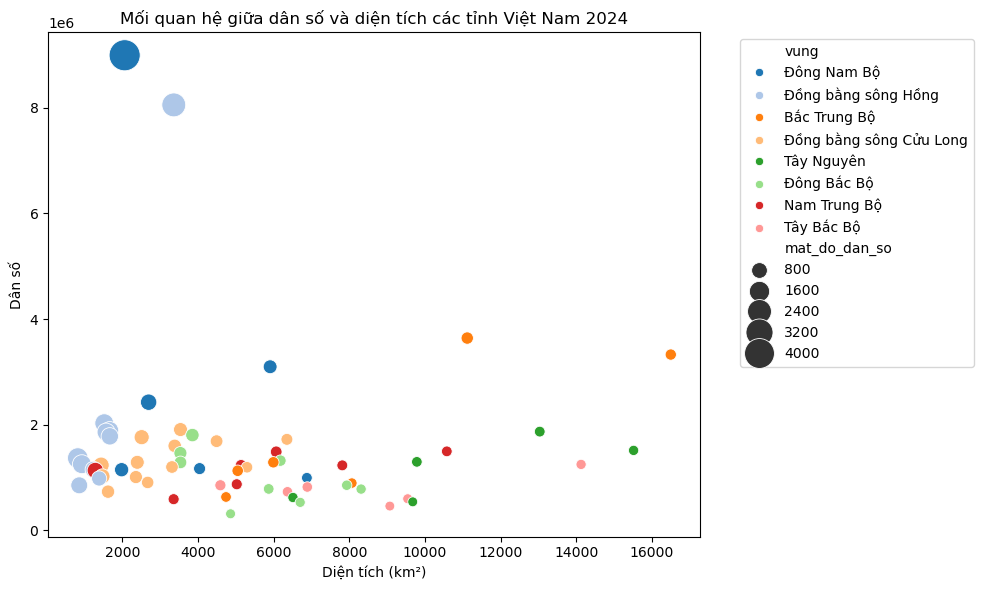

In [253]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='dien_tich', y='dan_so', data=df_population, hue='vung', size='mat_do_dan_so', sizes=(50, 500), palette='tab20')
plt.title('Mối quan hệ giữa dân số và diện tích các tỉnh Việt Nam 2024')
plt.xlabel('Diện tích (km²)')
plt.ylabel('Dân số')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 3.4. Biểu đồ tròn: Tỷ lệ dân số của 5 tỉnh cao nhất

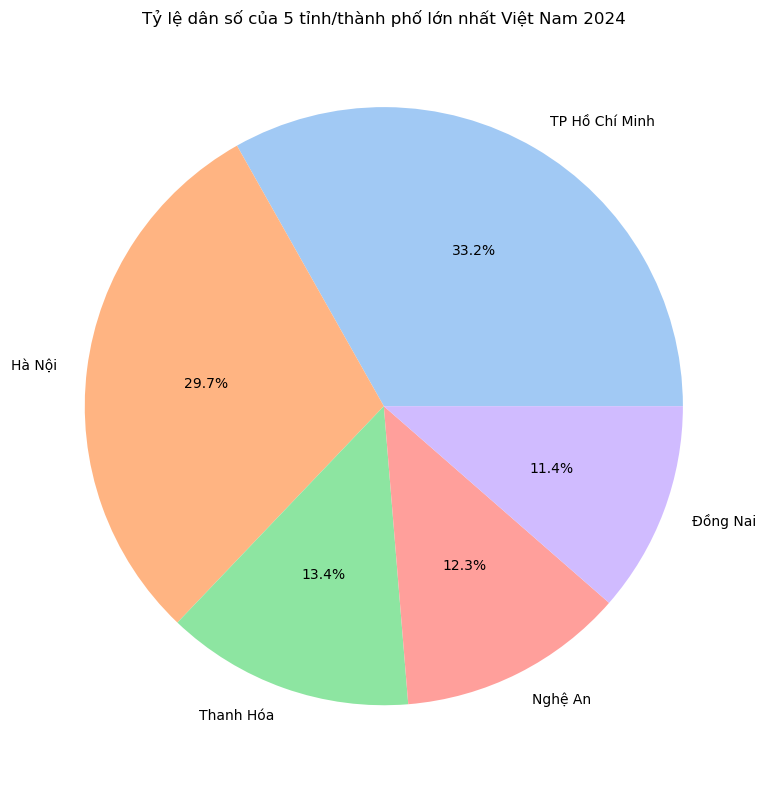

In [255]:
top_5_population = df_population.nlargest(5, 'dan_so')
plt.figure(figsize=(8, 8))
plt.pie(top_5_population['dan_so'], labels=top_5_population['khu_vuc'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Tỷ lệ dân số của 5 tỉnh/thành phố lớn nhất Việt Nam 2024')
plt.tight_layout()
plt.show()

### 3.5. Bản đồ nhiệt trên bản đồ Việt Nam

- Tải shapefile Việt Nam

In [257]:
shapefile_path = 'shapefiles/gadm41_VNM_1.shp'
gdf = gpd.read_file(shapefile_path)
gdf

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,VNM.1_1,VNM,Vietnam,An Giang,An Giang,NA,Tỉnh,Province,NA,VN.AG,VN-44,"POLYGON ((105.54862 10.42948, 105.54948 10.425..."
1,VNM.7_1,VNM,Vietnam,Bà Rịa - Vũng Tàu,Ba Ria - Vung Tau,NA,Tỉnh,Province,NA,VN.BV,NA,"MULTIPOLYGON (((107.09013 10.32397, 107.08952 ..."
2,VNM.3_1,VNM,Vietnam,Bắc Giang,Bac Giang,NA,Tỉnh,Province,NA,VN.BG,NA,"POLYGON ((106.28382 21.13225, 106.27898 21.132..."
3,VNM.4_1,VNM,Vietnam,Bắc Kạn,Bac Kan,NA,Tỉnh,Province,NA,VN.BK,NA,"POLYGON ((105.87241 21.85575, 105.8666 21.8597..."
4,VNM.2_1,VNM,Vietnam,Bạc Liêu,Bac Lieu,NA,Tỉnh,Province,NA,VN.BL,NA,"POLYGON ((105.42441 9.02131, 105.41638 9.01717..."
...,...,...,...,...,...,...,...,...,...,...,...,...
58,VNM.59_1,VNM,Vietnam,Trà Vinh,Tra Vinh,NA,Tỉnh,Province,NA,VN.TV,NA,"POLYGON ((106.41346 9.52921, 106.41077 9.52958..."
59,VNM.60_1,VNM,Vietnam,Tuyên Quang,Tuyen Quang,NA,Tỉnh,Province,NA,VN.TQ,NA,"POLYGON ((105.51038 21.60465, 105.51407 21.602..."
60,VNM.61_1,VNM,Vietnam,Vĩnh Long,Vinh Long,NA,Tỉnh,Province,NA,VN.VL,NA,"POLYGON ((106.06319 9.94754, 106.06268 9.94564..."
61,VNM.62_1,VNM,Vietnam,Vĩnh Phúc,Vinh Phuc,NA,Tỉnh,Province,NA,VN.VC,NA,"POLYGON ((105.57129 21.16154, 105.5709 21.1605..."


- Kiểm tra tên tỉnh trong shapefile và dữ liệu

In [259]:
print("Tên tỉnh trong shapefile (NAME_1):")
print(gdf['NAME_1'].unique())
print("\nTên tỉnh trong dữ liệu (khu_vuc):")
print(df_population['khu_vuc'].unique())

Tên tỉnh trong shapefile (NAME_1):
['An Giang' 'Bà Rịa - Vũng Tàu' 'Bắc Giang' 'Bắc Kạn' 'Bạc Liêu'
 'Bắc Ninh' 'Bến Tre' 'Bình Định' 'Bình Dương' 'Bình Phước' 'Bình Thuận'
 'Cà Mau' 'Cần Thơ' 'Cao Bằng' 'Đà Nẵng' 'Đắk Lắk' 'Đắk Nông' 'Điện Biên'
 'Đồng Nai' 'Đồng Tháp' 'Gia Lai' 'Hà Giang' 'Hà Nam' 'Hà Nội' 'Hà Tĩnh'
 'Hải Dương' 'Hải Phòng' 'Hậu Giang' 'Hồ Chí Minh' 'Hoà Bình' 'Hưng Yên'
 'Khánh Hòa' 'Kiên Giang' 'Kon Tum' 'Lai Châu' 'Lâm Đồng' 'Lạng Sơn'
 'Lào Cai' 'Long An' 'Nam Định' 'Nghệ An' 'Ninh Bình' 'Ninh Thuận'
 'Phú Thọ' 'Phú Yên' 'Quảng Bình' 'Quảng Nam' 'Quảng Ngãi' 'Quảng Ninh'
 'Quảng Trị' 'Sóc Trăng' 'Sơn La' 'Tây Ninh' 'Thái Bình' 'Thái Nguyên'
 'Thanh Hóa' 'Thừa Thiên Huế' 'Tiền Giang' 'Trà Vinh' 'Tuyên Quang'
 'Vĩnh Long' 'Vĩnh Phúc' 'Yên Bái']

Tên tỉnh trong dữ liệu (khu_vuc):
['TP Hồ Chí Minh' 'Hà Nội' 'Thanh Hóa' 'Nghệ An' 'Đồng Nai' 'Bình Dương'
 'Hải Phòng' 'An Giang' 'Hải Dương' 'Đắk Lắk' 'Thái Bình' 'Bắc Giang'
 'Nam Định' 'Tiền Giang' 'Kiên Giang' 'Long An

- Chuẩn hóa tên tỉnh trong shapefile để khớp với dữ liệu

In [261]:
gdf['NAME_1_normalized'] = gdf['NAME_1'].str.replace('Hồ Chí Minh', 'TP Hồ Chí Minh')\
                                        .str.replace('Thanh Hoa', 'Thanh Hóa')\
                                        .str.replace('Nghe An', 'Nghệ An')\
                                        .str.replace('Hai Phong', 'Hải Phòng')\
                                        .str.replace('Hai Duong', 'Hải Dương')\
                                        .str.replace('Thai Binh', 'Thái Bình')\
                                        .str.replace('Bac Giang', 'Bắc Giang')\
                                        .str.replace('Dong Nai', 'Đồng Nai')\
                                        .str.replace('Binh Duong', 'Bình Dương')\
                                        .str.replace('An Giang', 'An Giang')\
                                        .str.replace('Nam Dinh', 'Nam Định')\
                                        .str.replace('Tien Giang', 'Tiền Giang')\
                                        .str.replace('Kien Giang', 'Kiên Giang')\
                                        .str.replace('Long An', 'Long An')\
                                        .str.replace('Dong Thap', 'Đồng Tháp')\
                                        .str.replace('Gia Lai', 'Gia Lai')\
                                        .str.replace('Quang Nam', 'Quảng Nam')\
                                        .str.replace('Binh Dinh', 'Bình Định')\
                                        .str.replace('Phu Tho', 'Phú Thọ')\
                                        .str.replace('Bac Ninh', 'Bắc Ninh')\
                                        .str.replace('Quang Ninh', 'Quảng Ninh')\
                                        .str.replace('Lam Dong', 'Lâm Đồng')\
                                        .str.replace('Ha Tinh', 'Hà Tĩnh')\
                                        .str.replace('Ben Tre', 'Bến Tre')\
                                        .str.replace('Thai Nguyen', 'Thái Nguyên')\
                                        .str.replace('Hung Yen', 'Hưng Yên')\
                                        .str.replace('Son La', 'Sơn La')\
                                        .str.replace('Can Tho', 'Cần Thơ')\
                                        .str.replace('Quang Ngai', 'Quảng Ngãi')\
                                        .str.replace('Khanh Hoa', 'Khánh Hòa')\
                                        .str.replace('Binh Thuan', 'Bình Thuận')\
                                        .str.replace('Soc Trang', 'Sóc Trăng')\
                                        .str.replace('Ca Mau', 'Cà Mau')\
                                        .str.replace('Tay Ninh', 'Tây Ninh')\
                                        .str.replace('Vinh Phuc', 'Vĩnh Phúc')\
                                        .str.replace('Ba Ria - Vung Tau', 'Bà Rịa - Vũng Tàu')\
                                        .str.replace('Da Nang', 'Đà Nẵng')\
                                        .str.replace('Thua Thien - Hue', 'Thừa Thiên Huế')\
                                        .str.replace('Vinh Long', 'Vĩnh Long')\
                                        .str.replace('Tra Vinh', 'Trà Vinh')\
                                        .str.replace('Binh Phuoc', 'Bình Phước')\
                                        .str.replace('Ninh Binh', 'Ninh Bình')\
                                        .str.replace('Bac Lieu', 'Bạc Liêu')\
                                        .str.replace('Quang Binh', 'Quảng Bình')\
                                        .str.replace('Phu Yen', 'Phú Yên')\
                                        .str.replace('Ha Giang', 'Hà Giang')\
                                        .str.replace('Hoà Bình', 'Hòa Bình')\
                                        .str.replace('Hoa Binh', 'Hòa Bình')\
                                        .str.replace('Ha Nam', 'Hà Nam')\
                                        .str.replace('Yen Bai', 'Yên Bái')\
                                        .str.replace('Tuyen Quang', 'Tuyên Quang')\
                                        .str.replace('Lang Son', 'Lạng Sơn')\
                                        .str.replace('Hau Giang', 'Hậu Giang')\
                                        .str.replace('Lao Cai', 'Lào Cai')\
                                        .str.replace('Quang Tri', 'Quảng Trị')\
                                        .str.replace('Dak Nong', 'Đắk Nông')\
                                        .str.replace('Dien Bien', 'Điện Biên')\
                                        .str.replace('Ninh Thuan', 'Ninh Thuận')\
                                        .str.replace('Kon Tum', 'Kon Tum')\
                                        .str.replace('Cao Bang', 'Cao Bằng')\
                                        .str.replace('Lai Chau', 'Lai Châu')\
                                        .str.replace('Bac Kan', 'Bắc Kạn')

- Gộp dữ liệu với shapefile

In [263]:
gdf = gdf.merge(df_population, left_on='NAME_1_normalized', right_on='khu_vuc', how='left')

- Kiểm tra các tỉnh không khớp

In [265]:
missing_provinces = gdf[gdf['mat_do_dan_so'].isna()]['NAME_1'].unique()
if len(missing_provinces) > 0:
    print("\nCác tỉnh trong shapefile không khớp với dữ liệu:")
    print(missing_provinces)

- Vẽ bản đồ nhiệt theo mật độ dân số

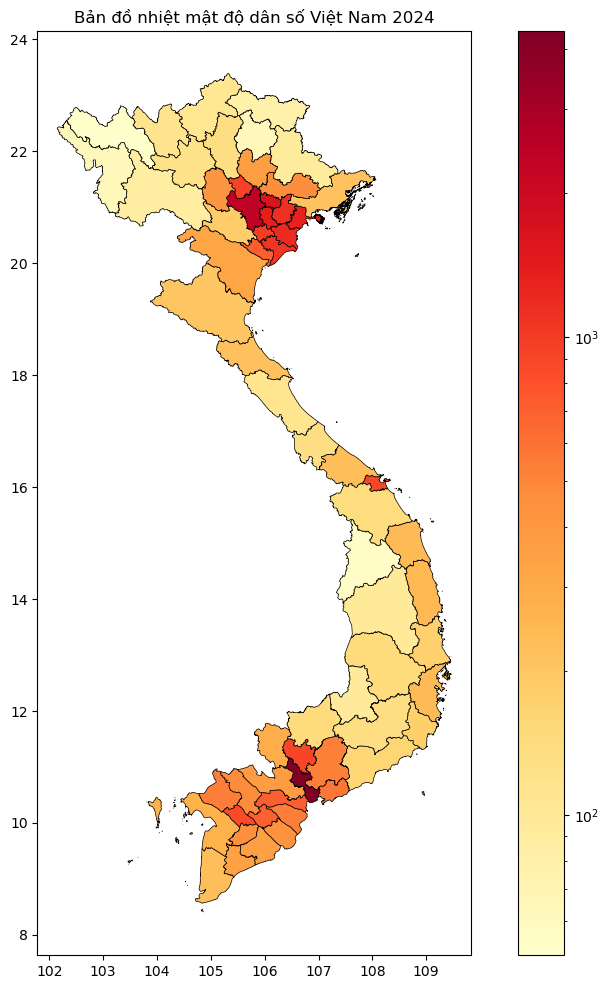

In [267]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
gdf.plot(column='mat_do_dan_so', ax=ax, legend=True, cmap='YlOrRd', 
         norm=LogNorm(vmin=df_population['mat_do_dan_so'].min(), vmax=df_population['mat_do_dan_so'].max()),
         missing_kwds={'color': 'lightgrey'},
         edgecolor='black', linewidth=0.5)
plt.title('Bản đồ nhiệt mật độ dân số Việt Nam 2024')
plt.show()

## 4. Phân tích và nhận xét

 - **Dân số tập trung**: TP Hồ Chí Minh và Hà Nội có dân số lớn nhất (lần lượt ~9 triệu và ~8 triệu), chiếm tỷ lệ đáng kể trong tổng dân số. Điều này phản ánh sự tập trung kinh tế và đô thị hóa mạnh ở hai thành phố này.
 - **Mật độ dân số**: TP Hồ Chí Minh và Bình Dương có mật độ dân số cao nhất, do diện tích nhỏ nhưng dân số đông, cho thấy áp lực đô thị hóa ở Đông Nam Bộ.
 - **Phân bố vùng**: Đông Nam Bộ (TP Hồ Chí Minh, Bình Dương, Đồng Nai) và Đồng bằng sông Hồng (Hà Nội, Hải Phòng, Thái Bình) là hai vùng có mật độ dân số cao nhất. Bắc Trung Bộ (Thanh Hóa, Nghệ An) có dân số đông nhưng mật độ thấp hơn do diện tích lớn.
 - **Bản đồ nhiệt**: Bản đồ nhiệt hiển thị đúng ranh giới các tỉnh Việt Nam, với Đông Nam Bộ và Đồng bằng sông Hồng có mật độ dân số cao (màu đỏ/cam), trong khi Tây Nguyên và Bắc Trung Bộ có mật độ thấp hơn (màu vàng/nhạt). Tất cả 63 tỉnh/thành phố đều được chuẩn hóa tên để đảm bảo gộp dữ liệu chính xác.
 - **Chuẩn hóa tên tỉnh**: Tên tỉnh trong dữ liệu và shapefile đã được chuẩn hóa, đặc biệt xử lý các trường hợp như "Hồ Chí Minh" → "TP Hồ Chí Minh" và "Hoà Bình" → "Hòa Bình".
 - **Biểu đồ phân tán**: Mỗi vùng địa lý được biểu thị bằng màu sắc khác nhau với bảng màu tab20 có độ tương phản cao, giúp người dùng dễ dàng phân biệt các khu vực như Đông Nam Bộ, Đồng bằng sông Hồng, và Tây Nguyên trong mối quan hệ giữa dân số và diện tích.
 - **Xuất file CSV**: File `vietnam_population_sorted_2024.csv` chứa dữ liệu đã sắp xếp theo dân số giảm dần, bao gồm cột vùng và mật độ dân số, với tên tỉnh đã chuẩn hóa.
 - **Ưu điểm của ánh xạ vùng đầy đủ**: Việc ánh xạ vùng và chuẩn hóa tên cho tất cả 63 tỉnh/thành phố giúp phân tích toàn diện và chính xác.